In [24]:
# import nstrace
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import decimal

In [2]:
filename = 'trace.tr'
with open(filename) as f:
    content = f.readlines()

In [3]:
splitter = lambda x: x.split()
split_list = list(map(splitter, content))

In [4]:
keep_cwnd = lambda x: x if 'cwnd_' in x else None
just_cwnd = list(map(keep_cwnd, split_list))

In [5]:
just_cwnd = list(filter((None).__ne__, just_cwnd))

In [6]:
data_maker = lambda x: [x[0], x[1], x[3], x[6]]
data = list(map(data_maker, just_cwnd))

In [7]:
stream_1_maker = lambda x: x if x[1] == '0' and x[2] == '4' else None
stream_1 = list(map(stream_1_maker, data))
stream_1 = list(filter((None).__ne__, stream_1))

stream_2_maker = lambda x: x if x[1] == '1' and x[2] == '5' else None
stream_2 = list(map(stream_2_maker, data))
stream_2 = list(filter((None).__ne__, stream_2))

In [8]:
print(len(stream_1), len(stream_2))

4689 4695


***

In [9]:
cwnd_file = 'cwnd'
with open(cwnd_file) as f:
    content = f.readlines()
splitter = lambda x: x[:-1].split()
split_cwnd = list(map(splitter, content))

In [10]:
time = list(map(lambda x: x[0], split_cwnd))
cwnd1 = list(map(lambda x: x[1], split_cwnd))
cwnd2 = list(map(lambda x: x[2], split_cwnd))

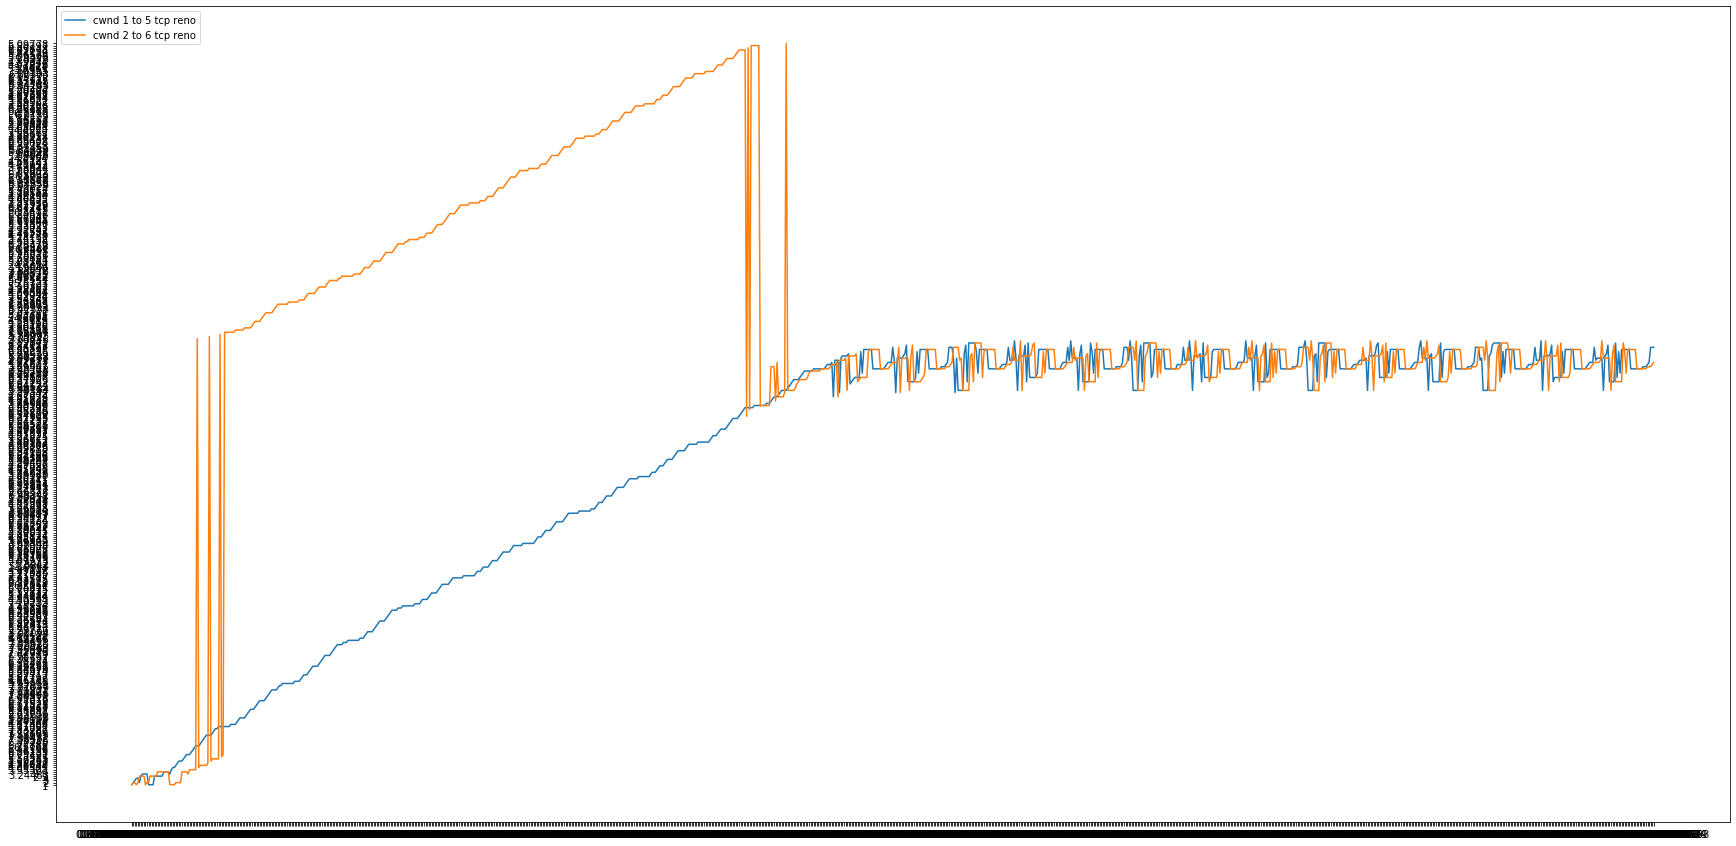

In [11]:
plt.figure(figsize=(30,15))
plt.plot(time, cwnd1)
plt.plot(time, cwnd2)
plt.legend(['cwnd 1 to 5 tcp reno', 'cwnd 2 to 6 tcp reno'], loc='upper left')
plt.show()

In [11]:
rtt_file = 'rtt'
with open(rtt_file) as f:
    content = f.readlines()
splitter = lambda x: x[:-1].split()
split_rtt = list(map(splitter, content))

time = list(map(lambda x: x[0], split_rtt))
rtt1 = list(map(lambda x: x[1], split_rtt))
rtt2 = list(map(lambda x: x[2], split_rtt))

In [12]:
plt.figure(figsize=(30,15))
plt.plot(time, rtt1)
plt.plot(time, rtt2)
plt.legend(['cwnd 1 to 5 tcp reno', 'cwnd 2 to 6 tcp reno'], loc='upper left')
plt.show()

KeyboardInterrupt: 

In [33]:
filename = 'trace.tr'
with open(filename) as f:
    content = f.readlines()
split_drop = list(map(lambda x: x[:-1].split(), content))
drop_data = list(map(lambda x: x if 'd' in x else None, split_drop))
drop_data = list(filter((None).__ne__, drop_data))

drop_1 = list(map(lambda x: float(x[1]) if x[7] == '0' else None, drop_data))
drop_1 = list(filter((None).__ne__, drop_1))

drop_2 = list(map(lambda x: float(x[1]) if x[7] == '1' else None, drop_data))
drop_2 = list(filter((None).__ne__, drop_2))

print(len(drop_1))
print(len(drop_2))

262
261


In [35]:
split_packet = list(map(lambda x: x[:-1].split(), content))
packet_data = list(map(lambda x: x if '+' in x else None, split_packet))
packet_data = list(filter((None).__ne__, packet_data))

packet_1 = list(map(lambda x: float(x[1]) if x[2] == '0' and x[3] == '2' else None, packet_data))
packet_1 = list(filter((None).__ne__, packet_1))

packet_2 = list(map(lambda x: float(x[1]) if x[2] == '1' and x[3] == '2' else None, packet_data))
packet_2 = list(filter((None).__ne__, packet_2))

print(len(packet_1))
print(len(packet_2))

6514
6520


In [68]:
time = list(np.arange(0.0, 999, 1))

def get_packet_loss(lost_packets, packets):
    packet_loss = []
    j, k = 0 ,0
    prev_i = 0
    for i in np.arange(0.0, 1000.0, 1):
        lost_num = 0
        packets_num = 0
        while(j < len(lost_packets) and lost_packets[j] < i):
            lost_num += 1
            j += 1
        while(k < len(packets) and packets[k] < i):
            packets_num += 1
            k += 1
        if(packets_num):
            packet_loss.append(lost_num/packets_num)
#         prev_i = i
    return packet_loss
packet_loss1 = get_packet_loss(drop_1, packet_1)
packet_loss2 = get_packet_loss(drop_2, packet_2)

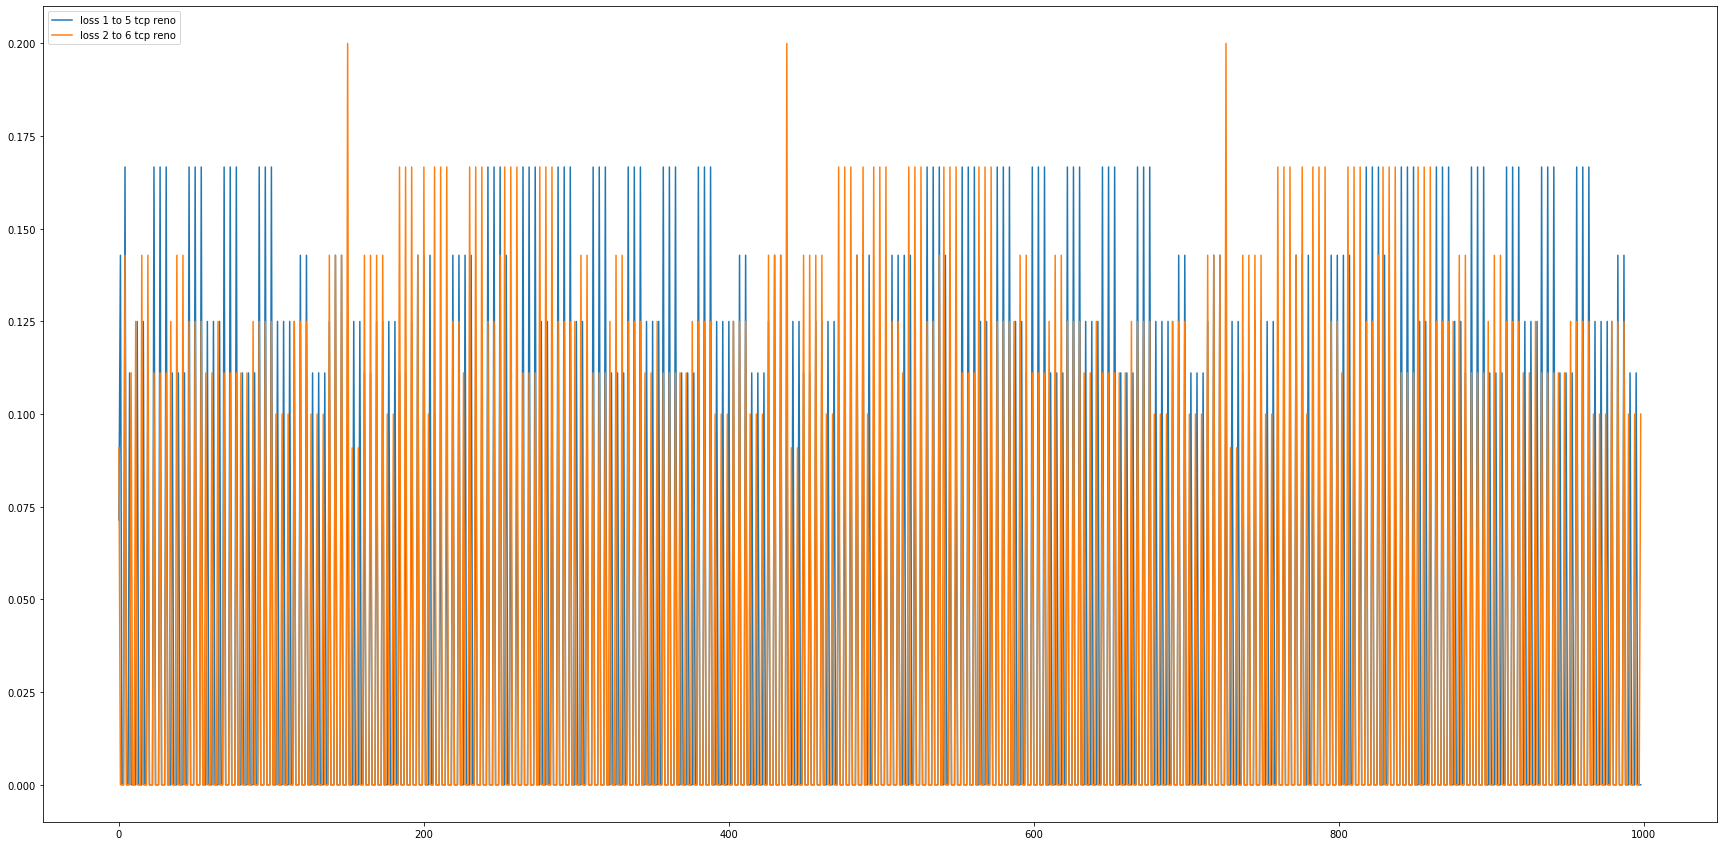

In [69]:
plt.figure(figsize=(30,15))
plt.plot(time, packet_loss1)
plt.plot(time, packet_loss2)
plt.legend(['loss 1 to 5 tcp reno', 'loss 2 to 6 tcp reno'], loc='upper left')
plt.show()
# len(packet_loss2)